<a href="https://colab.research.google.com/github/abhishekmani12/Loan-Predictor/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Loan Prediction/datasetTrain/train_ctrUa4K.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Loan Prediction/test_lAUu6dG.csv/test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**1 Target and 12 Independent Variables**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_original=train.copy()
test_original=test.copy()

Normalize set to true

In [ ]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

**Distribution of Independent variables-NUMERICAL**

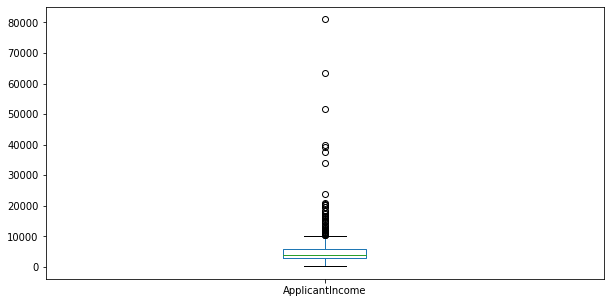

In [ ]:
train['ApplicantIncome'].plot.box(figsize=(10,5))
plt.show()

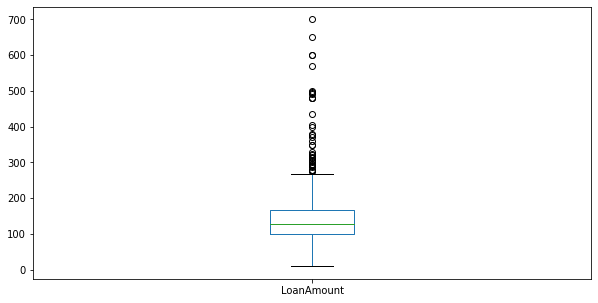

In [ ]:
train['LoanAmount'].plot.box(figsize=(10,5))
plt.show()

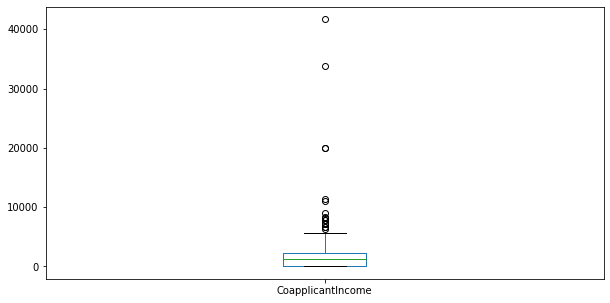

In [ ]:
train['CoapplicantIncome'].plot.box(figsize=(10,5))
plt.show()

**CATEGORICAL**

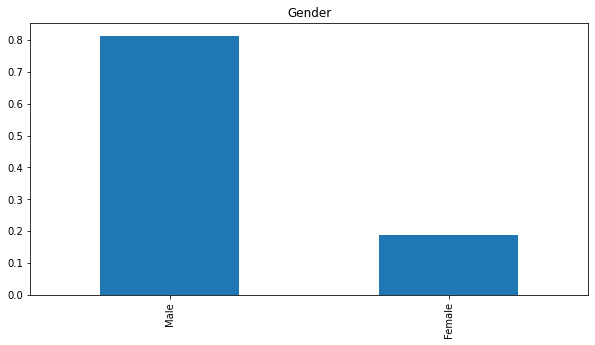

In [ ]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,5), title='Gender')

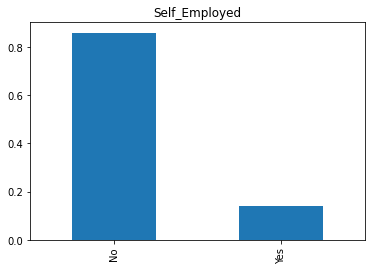

In [ ]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

**Independent vs Target Variable**

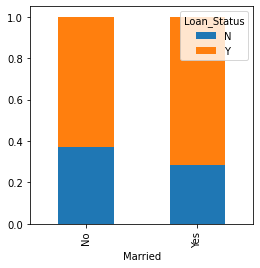

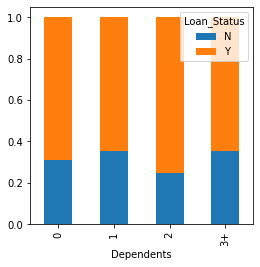

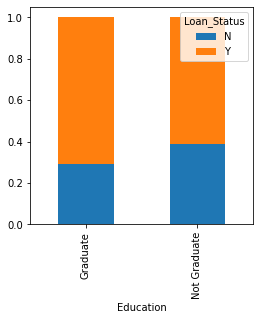

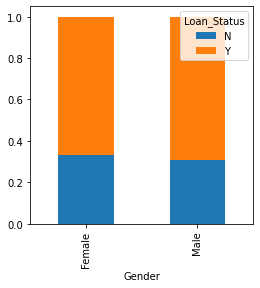

In [ ]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [ ]:
train['Dependents'].replace('3+', 3,inplace=True)

test['Dependents'].replace('3+', 3,inplace=True)

train['Loan_Status'].replace('N', 0,inplace=True)

train['Loan_Status'].replace('Y', 1,inplace=True)

**Heatmap of Numerical Variables**

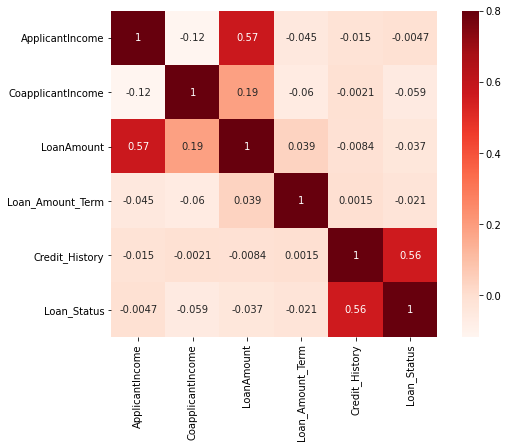

In [ ]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="Reds", annot = True)

**Filling up missing values**

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

train['Married'].fillna(train['Married'].mode()[0], inplace=True)

train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

test['Married'].fillna(train['Married'].mode()[0], inplace=True)

test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**Outllier Treatement**

In [ ]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
test['LoanAmount_log']=np.log(test['LoanAmount'])

**LOGISTIC REGRESSION**

In [ ]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [ ]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [ ]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.4)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy

In [ ]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7967479674796748

In [ ]:
pred_test = model.predict(test)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Loan Prediction/sample_submission_49d68Cx.csv/sample_submission_49d68Cx.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


EMI column addition to Ouput Folder

In [ ]:
submission['Loan_Status']=pred_test
submission['EMI']=test_original['LoanAmount']/test_original['Loan_Amount_Term']
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status','EMI']).to_csv('/content/drive/MyDrive/Loan Prediction/output_folder/outputrecord.csv')